# Milestone 1  

`Hussein MS | Batch 10 | Phase 0 `

## Description
Hasil pengerjaan Milestone 1 Batch 10 di phase 0
### Objective

`Analisis Penjualan Super Market dataset untuk menghasilkan sebuah insight informasi dari dataset yang telah diberikan` <br>
 

### Problem Statement
`Write your problem statement here` <br>
Supermarket merupakan tempat untuk menjual berbagai jenis item, dengan berbagai metode pembayaran didalamnya. Kemudahan melakukan transaksi tentu menjadi poin penting dalam kegiatan jual beli. ada konsumen yang lebih senang transaksi menggunakan Cash / Tunai, ada juga konsumen yang lebih suka Cashless. Untuk itu, akan dilakukan penelitian dari dataset Supermarket Sales guna mengetahui, Manakah yang frequensi **penggunaan untuk metode transaksi lebih sering**. Apakah Cashless / Cash. dan apakah **earning yang didapatkan juga berbeda secara signifikan?**

## **I. Import pustaka yang dibutuhkan**

library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## **II. Data Loading**

import dataset yang akan digunakan

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## **III. Data Cleaning**

In [6]:
#membuat copy dataset untuk antisipasi apabila terjadi kesalahan pengerjaan 
df_copy = df.copy()

pisah kolom bertipe object dan number

In [259]:
num_columns = df_copy.select_dtypes(include=np.number).columns.tolist()
cat_columns = df_copy.select_dtypes(include=['object']).columns.tolist()

print(num_columns)
print(cat_columns)

['Unit price', 'Quantity', 'Tax 5%', 'Total', 'gross income', 'Rating']
['Invoice ID', 'Branch', 'City', 'Customer_type', 'Gender', 'Product line', 'Time', 'Payment']


cek missing value

In [7]:
df_copy.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

drop kolom yang tidak akan digunakan 

In [8]:
df_copy.drop(['cogs','gross margin percentage'], axis = 1, inplace = True)

In [9]:
df_copy.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,30.2085,5.3


perbaikan nama kolom agar lebih mudah diolah

In [47]:
df_copy.rename(columns = {'Customer type':'Customer_type'}, inplace = True)

set kolom date ke tipe date

In [141]:
df_copy['Date']=pd.to_datetime(df_copy['Date'])

set index ke kolom variabel baru 

In [142]:
df_copy.index = df_copy['Date']

## **IV. Explorasi Data**

**Objective dari Explorasi Data**
1. Hitung Customer Type ( Normal / Member ) 
2. Hitung Total Transaksi menggunakan Cashless / Cash (E-wallet,Credit Card, Cash) 
3. Hitung rata rata yang uang dikeluarkan (E-wallet, Credit Card, Cash)

In [89]:
df_copy.describe()

,Unit price,Quantity,Tax 5%,Total,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,49.650000,10.00000


cek persebaran female - male

In [48]:
mnonm = pd.crosstab(df_copy['Customer_type'], df_copy['Gender'])
mnonm['total_customer'] = mnonm['Female'] + mnonm['Male']
mnonm 

Gender,Female,Male,total_customer
Customer_type,,,
Member,261,240,501
Normal,240,259,499


visualisasi awal

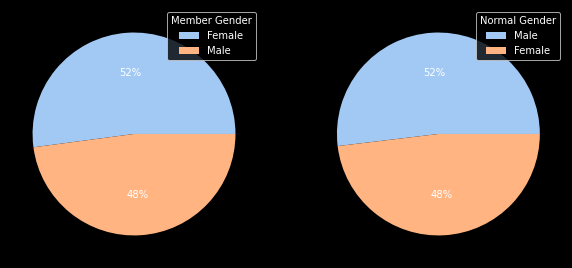

In [50]:
mem_gen = df_copy.query("Customer_type == 'Member'")['Gender'].value_counts()
norm_gen = df_copy.query("Customer_type == 'Normal'")['Gender'].value_counts()
colors = sns.color_palette('pastel')

fig, ax = plt.subplots(ncols=2,figsize=(10,5))
ax[0].pie(mem_gen.values, labels= mem_gen.index,autopct='%0.f%%',labeldistance=None,colors=colors)
ax[1].pie(norm_gen.values, labels= norm_gen.index,autopct='%0.f%%',labeldistance=None,colors=colors)
ax[0].legend(title='Member Gender')
ax[1].legend(title='Normal Gender')
plt.show()

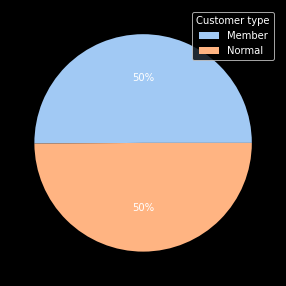

In [32]:
branch_count = df_copy['Customer type'].value_counts()
colors = sns.color_palette('pastel')

fig, ax = plt.subplots(figsize=(10,5))
ax.pie(branch_count.values,labels=branch_count.index,autopct='%0.f%%',labeldistance=None,colors=colors)
ax.legend(title='Customer type')
plt.show()

aggregating kolom untuk keperluan objektif

In [284]:
df_copy[df_copy['Customer_type'] == 'Member'][['Customer_type','Gender','Total']]

,Customer_type,Gender,Total
Date,,,
2019-01-05,Member,Female,548.9715
2019-01-27,Member,Male,489.0480
2019-02-25,Member,Female,433.6920
2019-01-10,Member,Female,76.1460
2019-02-20,Member,Female,172.7460
...,...,...,...
2019-03-29,Member,Male,864.5700
2019-01-28,Member,Male,633.1080
2019-02-18,Member,Female,63.9975


In [60]:
df_copy2 = df_copy.copy()

In [268]:
num_columns = df_copy2.select_dtypes(include=np.number).columns.tolist()
cat_columns = df_copy2.select_dtypes(include=['object']).columns.tolist()

print(num_columns)
print(cat_columns)

['Unit price', 'Quantity', 'Tax 5%', 'Total', 'gross income', 'Rating']
['Invoice ID', 'Branch', 'City', 'Customer_type', 'Gender', 'Product line', 'Time', 'Payment']


In [61]:
df_copy2['Payment'] = np.where(df_copy2['Payment'] == 'Ewallet', 'Cashless', df_copy2['Payment'])

In [65]:
df_copy2['Payment'] = np.where(df_copy2['Payment'] == 'Credit card', 'Cashless', df_copy2['Payment'])

perhitungan member dan normal yang menggunakan cash / cashless sebagai media pembayaran

In [68]:
trans1 = pd.crosstab(df_copy2['Customer_type'], df_copy2['Payment'])
trans1

Payment,Cash,Cashless
Customer_type,,
Member,168,333
Normal,176,323


perhitungan member dan normal yang menggunakan cash / cashless sebagai media pembayaran

In [72]:
trans = pd.crosstab(df_copy['Customer_type'], df_copy['Payment'])
trans['Total Transaksi'] = trans['Cash'] + trans['Credit card'] + trans['Ewallet']
trans

Payment,Cash,Credit card,Ewallet,Total Transaksi
Customer_type,,,,
Member,168,172,161,501
Normal,176,139,184,499


visualisasi bar plot

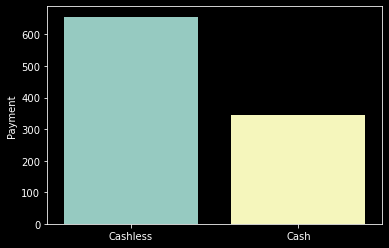

In [85]:
payment_meth = df_copy2['Payment'].value_counts()
sns.barplot(x=payment_meth.index,y=payment_meth,orient='v')
plt.show()

cek apakah sesuai dengan hasil visualisasi

In [71]:
df_copy2['Payment'].value_counts()

Cashless    656
Cash        344
Name: Payment, dtype: int64

cek total earning yang didapat melalui cash maupun cashless

In [91]:
totals_trans = pd.DataFrame(df_copy2.groupby(['Payment'])['Total'].sum())
totals_trans

,Total
Payment,
Cash,112206.570
Cashless,210760.179


bar plot untuk earning

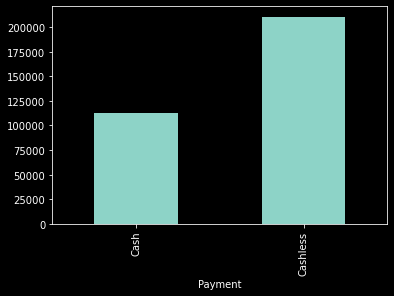

In [92]:
df_copy2.groupby('Payment').sum()['Total'].plot(kind='bar')
plt.show()

visualisasi untuk melihat gambaran manakah yang lebih mendominasi metode pembayarannya

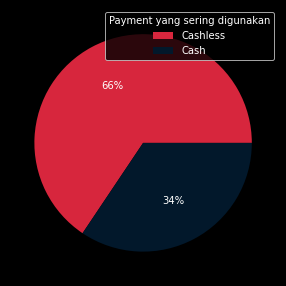

In [139]:
cc_totals = df_copy2['Payment'].value_counts()
colors = ['#D7263D','#02182B']

fig, ax = plt.subplots(figsize=(10,5))
ax.pie(cc_totals.values,labels=cc_totals.index,autopct='%0.f%%',labeldistance=None,colors=colors)
ax.legend(title='Payment yang sering digunakan')
plt.show()

Akan dihitung untuk pendapatan tiap hari 

In [93]:
df_copy2['Date']=pd.to_datetime(df_copy2['Date'])

In [94]:
df_copy2.index = df_copy2['Date']

In [95]:
df_copy2

,Invoice ID,Branch,City,Customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,gross income,Rating
Date,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Cashless,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Cashless,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Cashless,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Cashless,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-29,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Cashless,2.0175,6.2
2019-03-02,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Cashless,48.6900,4.4
2019-02-09,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,1.5920,7.7


In [99]:
daily_total = pd.DataFrame(df_copy2.groupby(by=[df_copy2.index.month, df_copy2.index.day,'Payment'])[['Total']].mean())
daily_total

Total
Date Date Payment            
1    1    Cash      322.31150
          Cashless  468.55200
     2    Cash      231.55650
          Cashless  254.81925
     3    Cash       71.20050
...                       ...
3    28   Cashless  228.14700
     29   Cash      429.97500
          Cashless  575.83575
     30   Cash      379.54350
          Cashless  457.56375

[176 rows x 1 columns]

In [118]:
daily_cash = df_copy2[df_copy2['Payment'] == 'Cash'][['Payment','Total']]
daily_cash

,Payment,Total
Date,,
2019-03-08,Cash,80.2200
2019-03-09,Cash,107.1420
2019-03-29,Cash,749.4900
2019-01-15,Cash,590.4360
2019-02-08,Cash,35.1960
...,...,...
2019-01-23,Cash,734.7060
2019-01-09,Cash,708.3195
2019-02-09,Cash,33.4320


In [119]:
daily_cash = pd.DataFrame(daily_cash.groupby(by=[daily_cash.index.month, daily_cash.index.day,'Payment'])[['Total']].mean())

hasil akhir siap untuk uji hipotesting

In [120]:
daily_cash

Total
Date Date Payment            
1    1    Cash     322.311500
     2    Cash     231.556500
     3    Cash      71.200500
     4    Cash     158.151000
     5    Cash     263.130000
...                       ...
3    26   Cash     116.962125
     27   Cash     400.428000
     28   Cash     210.791000
     29   Cash     429.975000
     30   Cash     379.543500

[87 rows x 1 columns]

In [112]:
daily_cashless = df_copy2[df_copy2['Payment'] == 'Cashless'][['Payment','Total']]
daily_cashless

,Payment,Total
Date,,
2019-01-05,Cashless,548.9715
2019-03-03,Cashless,340.5255
2019-01-27,Cashless,489.0480
2019-02-08,Cashless,634.3785
2019-03-25,Cashless,627.6165
...,...,...
2019-03-10,Cashless,121.8630
2019-02-22,Cashless,183.6450
2019-02-18,Cashless,63.9975


In [114]:
daily_cashless = pd.DataFrame(daily_cashless.groupby(by=[daily_cashless.index.month, daily_cashless.index.day,'Payment'])[['Total']].mean())

hasil akhir siap untuk uji hipotesting

In [115]:
daily_cashless

Total
Date Date Payment             
1    1    Cashless  468.552000
     2    Cashless  254.819250
     3    Cashless  322.621250
     4    Cashless  383.078500
     5    Cashless  297.595773
...                        ...
3    26   Cashless  166.073833
     27   Cashless  243.076500
     28   Cashless  228.147000
     29   Cashless  575.835750
     30   Cashless  457.563750

[89 rows x 1 columns]

Hasil mean dari rata rata yang akan di uji, terlihat tidak nampak perbedaan yang signifikan

In [122]:
daily_cash['Total'].mean(), daily_cashless['Total'].mean()

(318.8045192049809, 321.1457829666588)

Perbandingan Media Cashless (Ewallet / CC ?)

In [243]:
daily_ewallet = df_copy[df_copy['Payment'] == 'Ewallet'][['Payment','Total']]
daily_ewallet

,Payment,Total
Date,,
2019-01-05,Ewallet,548.9715
2019-01-27,Ewallet,489.0480
2019-02-08,Ewallet,634.3785
2019-03-25,Ewallet,627.6165
2019-02-25,Ewallet,433.6920
...,...,...
2019-03-10,Ewallet,121.8630
2019-02-22,Ewallet,183.6450
2019-02-18,Ewallet,63.9975


In [244]:
daily_ewallet = pd.DataFrame(daily_ewallet.groupby(by=[daily_ewallet.index.month, daily_ewallet.index.day,'Payment'])[['Total']].mean())

In [245]:
daily_ewallet

Total
Date Date Payment            
1    1    Ewallet  148.827000
     2    Ewallet  262.458000
     3    Ewallet  327.677000
     4    Ewallet  373.170000
     5    Ewallet  346.896375
...                       ...
3    26   Ewallet  246.974000
     27   Ewallet  290.766000
     28   Ewallet  247.495500
     29   Ewallet  575.835750
     30   Ewallet  567.787500

[89 rows x 1 columns]

hasil akhir siap untuk uji hipotesting

In [246]:
daily_ewallet['Total'].mean()

307.01360547752813

In [247]:
daily_cc = df_copy[df_copy['Payment'] == 'Credit card'][['Payment','Total']]
daily_cc

,Payment,Total
Date,,
2019-03-03,Credit card,340.5255
2019-01-10,Credit card,76.1460
2019-02-20,Credit card,172.7460
2019-03-11,Credit card,506.6355
2019-01-01,Credit card,457.4430
...,...,...
2019-03-10,Credit card,26.7225
2019-02-04,Credit card,71.1585
2019-01-03,Credit card,520.8000


In [248]:
daily_cc = pd.DataFrame(daily_cc.groupby(by=[daily_cc.index.month, daily_cc.index.day,'Payment'])[['Total']].mean())

In [249]:
daily_cc

Total
Date Date Payment                
1    1    Credit card  628.414500
     2    Credit card  252.273000
     3    Credit card  317.565500
     4    Credit card  388.032750
     5    Credit card  269.424000
...                           ...
3    25   Credit card  248.409000
     26   Credit card  125.623750
     27   Credit card  207.309375
     28   Credit card  213.635625
     30   Credit card  347.340000

[85 rows x 1 columns]

hasil akhir siap untuk uji hipotesting

In [250]:
daily_cc['Total'].mean()

332.27148602941173

Hasil mean dari rata rata yang akan di uji, terlihat tidak nampak perbedaan yang signifikan

In [251]:
daily_ewallet['Total'].mean(), daily_cc['Total'].mean()

(307.01360547752813, 332.27148602941173)

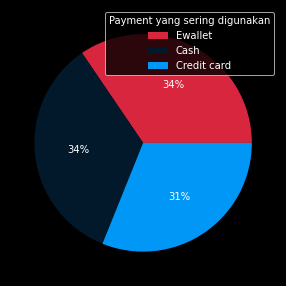

In [252]:
cc_ewal = df_copy['Payment'].value_counts()
colors = ['#D7263D','#02182B','#0197F6']

fig, ax = plt.subplots(figsize=(10,5))
ax.pie(cc_ewal.values,labels=cc_ewal.index,autopct='%0.f%%',labeldistance=None,colors=colors)
ax.legend(title='Payment yang sering digunakan')
plt.show()

### **1. Measure of Central Tendency**

hitung Central tendecy dari kolom yang sudah dikelompokan tadi

In [267]:
df_mean = df_copy[num_columns].mean().rename('mean')
df_median = df_copy[num_columns].median().rename('median')
df_mode = df_copy[num_columns + cat_columns].mode().iloc[0].rename('mode')

ct = pd.concat([df_mean, df_median, df_mode], axis=1)
ct

,mean,median,mode
Unit price,55.672130,55.230,83.77
Quantity,5.510000,5.000,10.0
Tax 5%,15.379369,12.088,4.154
Total,322.966749,253.848,87.234
gross income,15.379369,12.088,4.154
Rating,6.972700,7.000,6.0
Invoice ID,NaN,NaN,101-17-6199
Branch,NaN,NaN,A
City,NaN,NaN,Yangon
Customer_type,NaN,NaN,Member


hitung Central tendecy dari kolom yang sudah dikelompokan tadi

In [269]:
df_mean2 = df_copy2[num_columns].mean().rename('mean')
df_med2 = df_copy2[num_columns].median().rename('median')
df_mode2 = df_copy2[num_columns + cat_columns].mode().iloc[0].rename('mode')

ct = pd.concat([df_mean2, df_med2, df_mode2], axis=1)
ct

,mean,median,mode
Unit price,55.672130,55.230,83.77
Quantity,5.510000,5.000,10.0
Tax 5%,15.379369,12.088,4.154
Total,322.966749,253.848,87.234
gross income,15.379369,12.088,4.154
Rating,6.972700,7.000,6.0
Invoice ID,NaN,NaN,101-17-6199
Branch,NaN,NaN,A
City,NaN,NaN,Yangon
Customer_type,NaN,NaN,Member


### **2. Measure of Variance**

hitung MOV dari kolom yang sudah dikelompokan tadi

In [270]:
df_var = df_copy[num_columns].var().rename('variance')
df_var

Unit price        701.965331
Quantity            8.546446
Tax 5%            137.096594
Total           60459.598018
gross income      137.096594
Rating              2.953518
Name: variance, dtype: float64

hitung MOV dari kolom yang sudah dikelompokan tadi

In [271]:
df_var = df_copy2[num_columns].var().rename('variance')
df_var

Unit price        701.965331
Quantity            8.546446
Tax 5%            137.096594
Total           60459.598018
gross income      137.096594
Rating              2.953518
Name: variance, dtype: float64

## **V. Hyphotesis Testing**

Dari hasil eksplorasi data yang dilakukan, setidaknya terdapat 2 Hipotesis yang akan di uji. 
1. Apakah Rata Rata pendapatan menggunakan Cashless sama atau lebih besar dibandingkan menggunakan cash?
2. Dari hasil akhir Uji Hipotesis pertama, akan di uji kembali, apabila H0 gagal ditolak, maka kita akan lanjutkan uji hipotesis, manakah yang Rata Rata Pendapatan perharinya lebih tinggi.

**Hipotesis kita pada kasus ini:**

**H0: μ_Cashless >= μ_Cash**

**H1: μ_Cashless < μ_Cash**

In [220]:
t_stat,p_val = stats.ttest_ind(daily_cashless,daily_cash)
print('P-value: ',p_val[0])
print('T-statistics: ',t_stat[0])

P-value:  0.9006837877288011
T-statistics:  0.12497983781686967


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


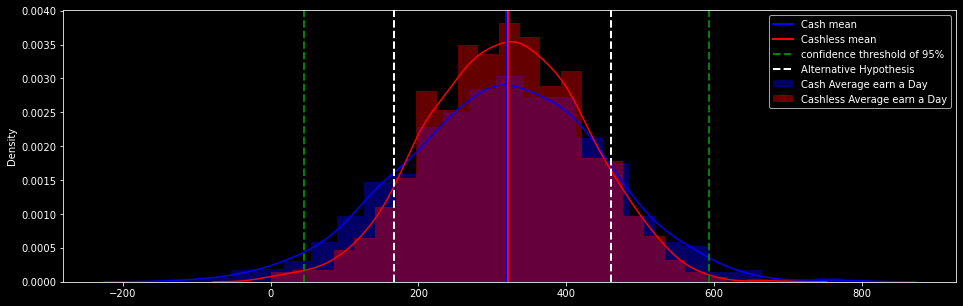

In [235]:
cash_pop = np.random.normal(daily_cash.Total.mean(),daily_cash.Total.std(),1000)
cashless_pop = np.random.normal(daily_cashless.Total.mean(),daily_cashless.Total.std(),1000)

ci = stats.norm.interval(0.95, daily_cash.Total.mean(), daily_cash.Total.std())
plt.figure(figsize=(16,5))
sns.distplot(cash_pop, label='Cash Average earn a Day',color='blue')
sns.distplot(cashless_pop, label='Cashless Average earn a Day',color='red')

plt.axvline(daily_cash.Total.mean(), color='blue', linewidth=2, label='Cash mean')
plt.axvline(daily_cashless.Total.mean(), color='red',  linewidth=2, label='Cashless mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(cash_pop.mean()+t_stat[0]*cash_pop.std(), color='white', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(cash_pop.mean()-t_stat[0]*cash_pop.std(), color='white', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

Dari hasil perhitungan diatas, bisa kita simpulkan bahwa kita Gagal menolak H0 (Kesimpulan lengkapnya akan ditaruh dibagian kesimpulan)

Karena kita gagal menolak H0, maka akan kita uji lagi manakah diantara Cashless, yang rata-rata earning perharinya lebih tinggi

**Hipotesis kita pada kasus ini:**

**H0: μ_Ewallet >= μ_Credit card**

**H1: μ_Ewallet < μ_Credit card**

In [253]:
t_stat,p_val = stats.ttest_ind(daily_cc,daily_ewallet)
print('P-value: ',p_val[0])
print('T-statistics: ',t_stat[0])

P-value:  0.27284348399468167
T-statistics:  1.10005940206908


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


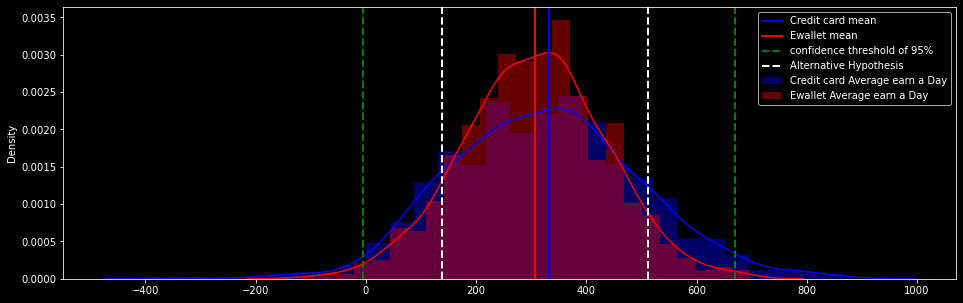

In [258]:
credit_card = np.random.normal(daily_cc.Total.mean(),daily_cc.Total.std(),1000)
ewallet = np.random.normal(daily_ewallet.Total.mean(),daily_ewallet.Total.std(),1000)

ic = stats.norm.interval(0.95, daily_cc.Total.mean(), daily_cc.Total.std())
plt.figure(figsize=(16,5))
sns.distplot(credit_card, label='Credit card Average earn a Day',color='blue')
sns.distplot(ewallet, label='Ewallet Average earn a Day',color='red')

plt.axvline(daily_cc.Total.mean(), color='blue', linewidth=2, label='Credit card mean')
plt.axvline(daily_ewallet.Total.mean(), color='red',  linewidth=2, label='Ewallet mean')

plt.axvline(ic[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ic[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(credit_card.mean()+t_stat[0]*credit_card.std(), color='white', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(credit_card.mean()-t_stat[0]*credit_card.std(), color='white', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

Dari hasil perhitungan diatas, bisa kita simpulkan bahwa kita Gagal menolak H0 (Kesimpulan lengkapnya akan ditaruh dibagian kesimpulan)

In [273]:
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2019-01-05 to 2019-02-18
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer_type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product line   1000 non-null   object        
 6   Unit price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Tax 5%         1000 non-null   float64       
 9   Total          1000 non-null   float64       
 10  Date           1000 non-null   datetime64[ns]
 11  Time           1000 non-null   object        
 12  Payment        1000 non-null   object        
 13  gross income   1000 non-null   float64       
 14  Rating         1000 non-null   float64       
dtypes: 

In [287]:
df_copy.to_csv('df_copy.csv')


## **VI. Pengambilan Kesimpulan**

Pada Objek Analisis yang akan dilakukan tadi, semua jawaban didapatkan dari hasil Uji Hipotesis serta saat melakukan Eksplorasi data. dimana
<p>1. Kita ketahui, bahwa ternyata frequensi penggunaan metode pembayaran secara cashless lebih sering ditemui dibandingkan dengan yang menggunakan cash.</p>
<p>2. Saat melakukan Uji hipotesting pertama, dimana Hipotesis yang kita uji yakni, apakah karena frequensinya sering muncul membuat rata-rata pendapatan menggunakan metode cashless lebih tinggi dibandingkan menggunakan cash?. hasil yang didapat yaitu, karena H0 Gagal ditolak, hal menunjukan bahwa metode Cashless memang memiliki rata rata pendapatan perhari yang lebih tinggi dibandingkan metode Cash.
<p>3. Lalu dari metode cashless tadi, manakah yang memiliki rata rata paling tinggi diantara ke-2nya? hasil yang didapat ternyata, karena gagal menolak H0, artinya rata rata pendapatan e-wallet perhari lebih kecil dibandingkan credit card.